In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
%matplotlib inline
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
from ydata_profiling import ProfileReport
import math


In [34]:
original_data=pd.read_csv(r"C:\Users\DELL\Downloads\archive\diabetes_binary_health_indicators_BRFSS2021.csv",sep=",", encoding = 'utf-')

In [3]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\archive\diabetes_binary_health_indicators_BRFSS2021.csv",sep=",",encoding = 'utf-')
data


Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0       0       1.0          1  15.0     1.0     0.0   
1                   1.0       1       0.0          1  28.0     0.0     0.0   
2                   1.0       1       1.0          1  33.0     0.0     0.0   
3                   1.0       0       1.0          1  29.0     0.0     1.0   
4                   0.0       0       0.0          1  24.0     1.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
236373              1.0       1       1.0          1  21.0     0.0     0.0   
236374              0.0       1       0.0          1  25.0     1.0     0.0   
236375              0.0       0       1.0          1  31.0     0.0     0.0   
236376              0.0       1       0.0          1  24.0     0.0     0.0   
236377              0.0       0       1.0          1  32.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0             0       1  ...              1   
1                        1.0             0       1  ...              1   
2                        0.0             1       1  ...              1   
3                        1.0             1       1  ...              1   
4                        0.0             0       0  ...              1   
...                      ...           ...     ...  ...            ...   
236373                   0.0             1       1  ...              1   
236374                   0.0             1       1  ...              0   
236375                   0.0             1       1  ...              1   
236376                   0.0             1       1  ...              1   
236377                   0.0             1       0  ...              1   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
0               0.0      5.0      10.0      20.0       0.0    0   11   
1               0.0      2.0       0.0       0.0       0.0    0   11   
2               0.0      2.0      10.0       0.0       0.0    0    9   
3               0.0      5.0       0.0      30.0       1.0    1   12   
4               0.0      3.0       0.0       0.0       1.0    1   13   
...             ...      ...       ...       ...       ...  ...  ...   
236373          0.0      4.0       0.0       0.0       0.0    1   10   
236374          1.0      2.0      20.0       0.0       0.0    0    3   
236375          0.0      2.0       0.0       0.0       0.0    1    7   
236376          0.0      2.0       0.0       0.0       0.0    1   10   
236377          0.0      1.0       2.0       2.0       0.0    0    6   

        Education  Income  
0             4.0     5.0  
1             4.0     3.0  
2             4.0     7.0  
3             3.0     4.0  
4             5.0     6.0  
...           ...     ...  
236373        2.0     3.0  
236374        4.0     5.0  
236375        6.0    10.0  
236376        4.0     6.0  
236377        6.0     6.0  

[236378 rows x 22 columns]

In [4]:
profile=ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
data.head

<bound method NDFrame.head of         Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0       0       1.0          1  15.0     1.0     0.0   
1                   1.0       1       0.0          1  28.0     0.0     0.0   
2                   1.0       1       1.0          1  33.0     0.0     0.0   
3                   1.0       0       1.0          1  29.0     0.0     1.0   
4                   0.0       0       0.0          1  24.0     1.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
236373              1.0       1       1.0          1  21.0     0.0     0.0   
236374              0.0       1       0.0          1  25.0     1.0     0.0   
236375              0.0       0       1.0          1  31.0     0.0     0.0   
236376              0.0       1       0.0          1  24.0     0.0     0.0   
236377              0.0       0       1.0          1  32.0     0.0     0.0   

        HeartDiseaseorAttack  Phy

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [7]:
data.shape

(236378, 22)

In [8]:
data.describe()

Diabetes_binary         HighBP       HighChol      CholCheck  \
count    236378.000000  236378.000000  236378.000000  236378.000000   
mean          0.142010       0.418558       0.402059       0.963347   
std           0.349061       0.493324       0.490315       0.187909   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  236378.000000  236378.000000  236378.000000         236378.000000   
mean       28.953579       0.411997       0.038900              0.086548   
std         6.552055       0.492196       0.193356              0.281172   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        28.000000       0.000000       0.000000              0.000000   
75%        32.000000       1.000000       0.000000              0.000000   
max        99.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  236378.000000  236378.000000  ...  236378.000000  236378.000000   
mean        0.779231       0.621259  ...       0.962573       0.063737   
std         0.414766       0.485074  ...       0.189807       0.244284   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  236378.000000  236378.000000  236378.000000  236378.000000   
mean        2.480717       3.937710       3.751297       0.153948   
std         1.029134       7.886506       8.245907       0.360900   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       4.000000       2.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  236378.000000  236378.000000  236378.000000  236378.000000  
mean        0.477824       7.863930       5.139099       6.927451  
std         0.499509       3.236997       0.946185       2.375450  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       5.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       9.000000  
max         1.000000      13.000000       6.000000      11.000000  

[8 rows x 22 columns]

preprocessing


In [9]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       236378 non-null  int32
 1   HighBP                236378 non-null  int32
 2   HighChol              236378 non-null  int32
 3   CholCheck             236378 non-null  int32
 4   BMI                   236378 non-null  int32
 5   Smoker                236378 non-null  int32
 6   Stroke                236378 non-null  int32
 7   HeartDiseaseorAttack  236378 non-null  int32
 8   PhysActivity          236378 non-null  int32
 9   Fruits                236378 non-null  int32
 10  Veggies               236378 non-null  int32
 11  HvyAlcoholConsump     236378 non-null  int32
 12  AnyHealthcare         236378 non-null  int32
 13  NoDocbcCost           236378 non-null  int32
 14  GenHlth               236378 non-null  int32
 15  MentHlth              236378 non-n

In [11]:
data.head()

Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                0       0         1          1   15       1       0   
1                1       1         0          1   28       0       0   
2                1       1         1          1   33       0       0   
3                1       0         1          1   29       0       1   
4                0       0         0          1   24       1       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       1  ...              1   
1                     1             0       1  ...              1   
2                     0             1       1  ...              1   
3                     1             1       1  ...              1   
4                     0             0       0  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        10        20         0    0   11          4   
1            0        2         0         0         0    0   11          4   
2            0        2        10         0         0    0    9          4   
3            0        5         0        30         1    1   12          3   
4            0        3         0         0         1    1   13          5   

   Income  
0       5  
1       3  
2       7  
3       4  
4       6  

[5 rows x 22 columns]

In [12]:
data.describe()

Diabetes_binary         HighBP       HighChol      CholCheck  \
count    236378.000000  236378.000000  236378.000000  236378.000000   
mean          0.142010       0.418558       0.402059       0.963347   
std           0.349061       0.493324       0.490315       0.187909   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  236378.000000  236378.000000  236378.000000         236378.000000   
mean       28.953579       0.411997       0.038900              0.086548   
std         6.552055       0.492196       0.193356              0.281172   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        28.000000       0.000000       0.000000              0.000000   
75%        32.000000       1.000000       0.000000              0.000000   
max        99.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  236378.000000  236378.000000  ...  236378.000000  236378.000000   
mean        0.779231       0.621259  ...       0.962573       0.063737   
std         0.414766       0.485074  ...       0.189807       0.244284   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  236378.000000  236378.000000  236378.000000  236378.000000   
mean        2.480717       3.937710       3.751297       0.153948   
std         1.029134       7.886506       8.245907       0.360900   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       4.000000       2.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  236378.000000  236378.000000  236378.000000  236378.000000  
mean        0.477824       7.863930       5.139099       6.927451  
std         0.499509       3.236997       0.946185       2.375450  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       5.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       9.000000  
max         1.000000      13.000000       6.000000      11.000000  

[8 rows x 22 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       236378 non-null  int32
 1   HighBP                236378 non-null  int32
 2   HighChol              236378 non-null  int32
 3   CholCheck             236378 non-null  int32
 4   BMI                   236378 non-null  int32
 5   Smoker                236378 non-null  int32
 6   Stroke                236378 non-null  int32
 7   HeartDiseaseorAttack  236378 non-null  int32
 8   PhysActivity          236378 non-null  int32
 9   Fruits                236378 non-null  int32
 10  Veggies               236378 non-null  int32
 11  HvyAlcoholConsump     236378 non-null  int32
 12  AnyHealthcare         236378 non-null  int32
 13  NoDocbcCost           236378 non-null  int32
 14  GenHlth               236378 non-null  int32
 15  MentHlth              236378 non-n

In [14]:
data.isnull().sum ()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [15]:
unique_values = {}
for col in data.columns:
    unique_values[col]=data[col].value_counts().shape[0]
    pd.DataFrame(unique_values,index=['unique value count']).transpose()

In [16]:
def v_counts(dataframe):
    for i in dataframe:
        print(dataframe[i].value_counts())
        print("--------------------------")

In [17]:
v_counts(data)

0    202810
1     33568
Name: Diabetes_binary, dtype: int64
--------------------------
0    137440
1     98938
Name: HighBP, dtype: int64
--------------------------
0    141340
1     95038
Name: HighChol, dtype: int64
--------------------------
1    227714
0      8664
Name: CholCheck, dtype: int64
--------------------------
27    21733
26    17930
24    17175
28    15225
25    14722
      ...  
89        1
90        1
95        1
91        1
92        1
Name: BMI, Length: 84, dtype: int64
--------------------------
0    138991
1     97387
Name: Smoker, dtype: int64
--------------------------
0    227183
1      9195
Name: Stroke, dtype: int64
--------------------------
0    215920
1     20458
Name: HeartDiseaseorAttack, dtype: int64
--------------------------
1    184193
0     52185
Name: PhysActivity, dtype: int64
--------------------------
1    146852
0     89526
Name: Fruits, dtype: int64
--------------------------
1    195666
0     40712
Name: Veggies, dtype: int64
-----------------

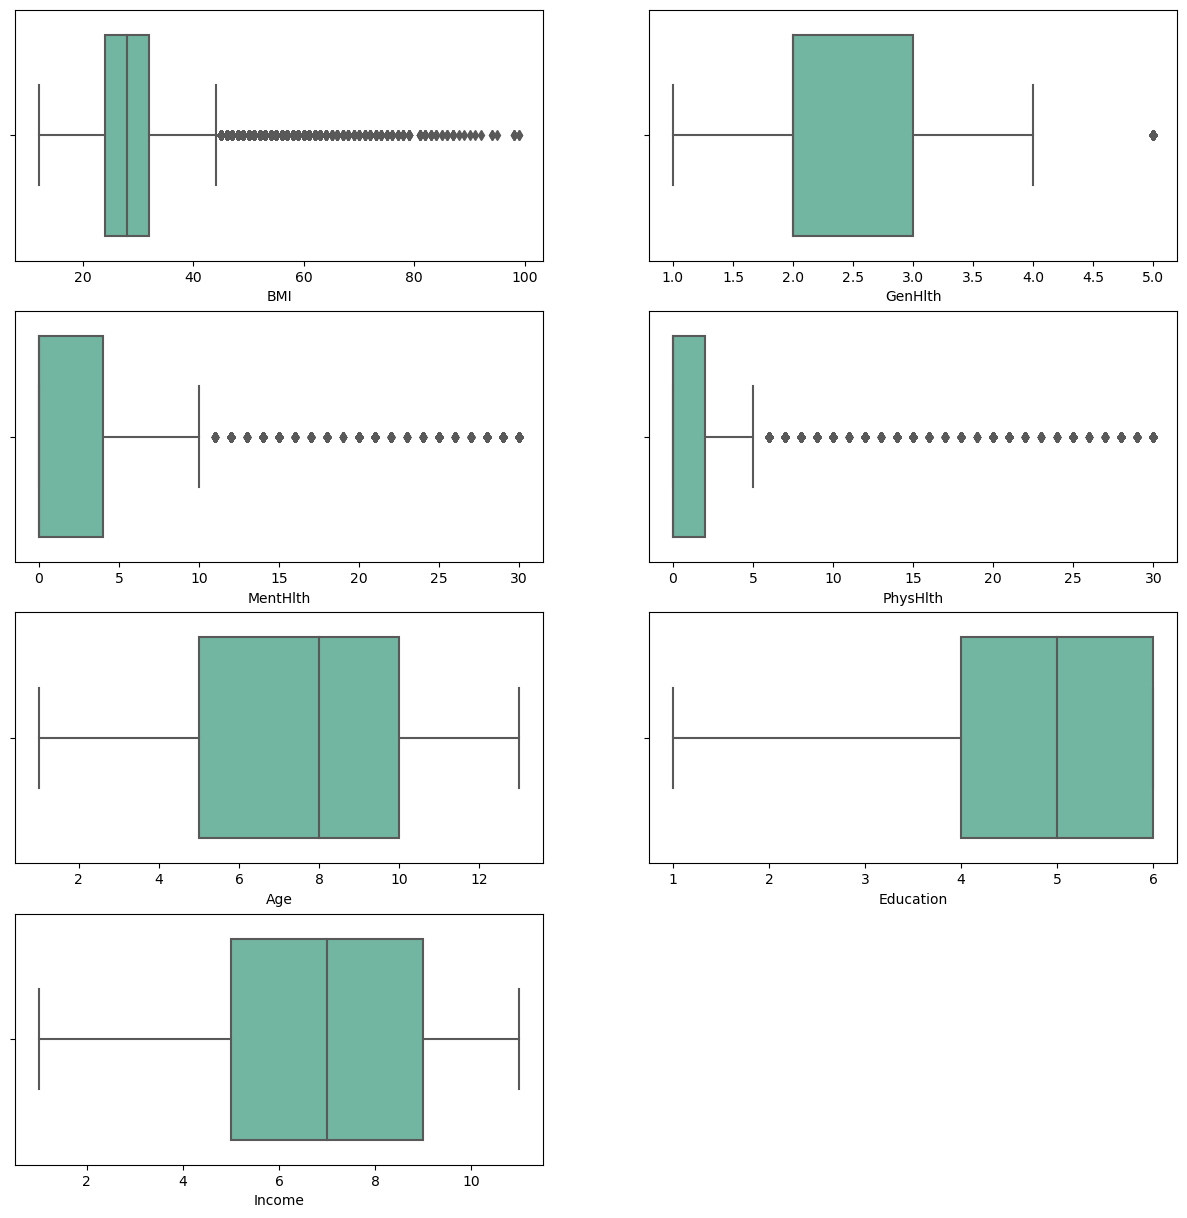

In [18]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

check and drop duplicated data

In [19]:
data.duplicated().sum()

13135

In [20]:
data.drop_duplicates(inplace = True)

In [21]:
data.duplicated().sum()

0

In [22]:
data.shape

(223243, 22)

some codes are helpful us in EDA PART

In [23]:
data2=data.copy()

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_012[data2['Diabetes_012'] == 0] = 'No Diabetes'
data2.Diabetes_012[data2['Diabetes_012'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 1] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 2] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 4] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 5] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $50,000'
data2.Income[data2['Income'] == 7] = 'Less Than $75,000'
data2.Income[data2['Income'] == 8] = 'Less Than $100,000'
data2.Income[data2['Income'] == 9] = 'Less Than $150,000'
data2.Income[data2['Income'] == 10] = 'Less Than $200,000'
data2.Income[data2['Income'] == 11] = '$200,000 or More'


EDA

Text(0.5, 1.0, 'correlation of feature')

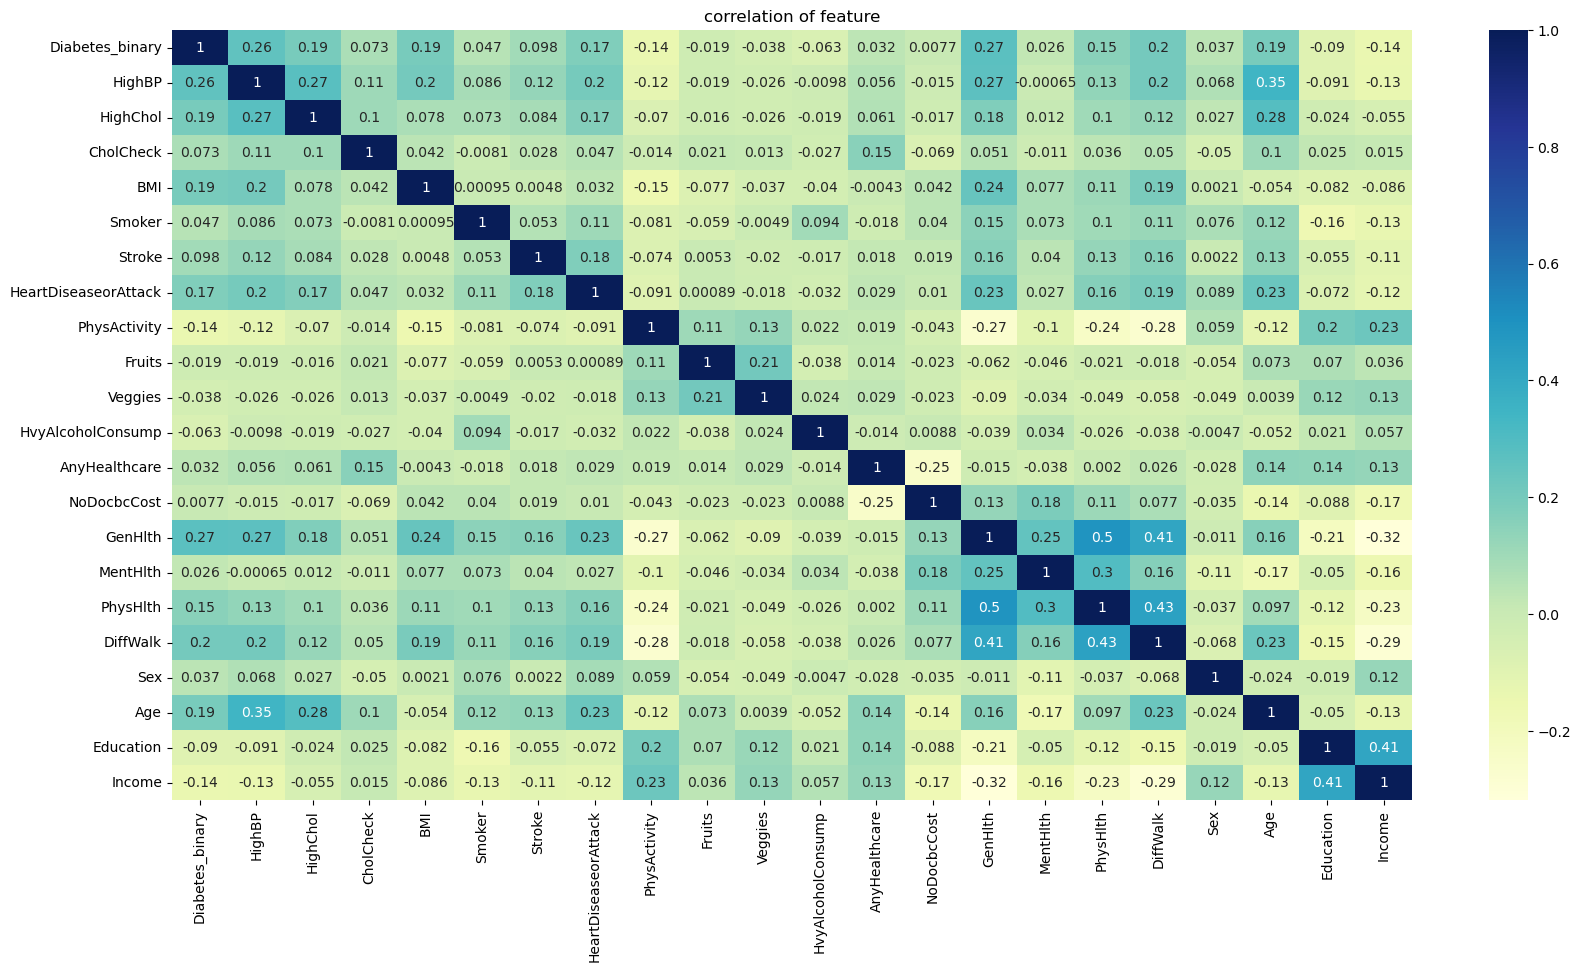

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.title("correlation of feature")

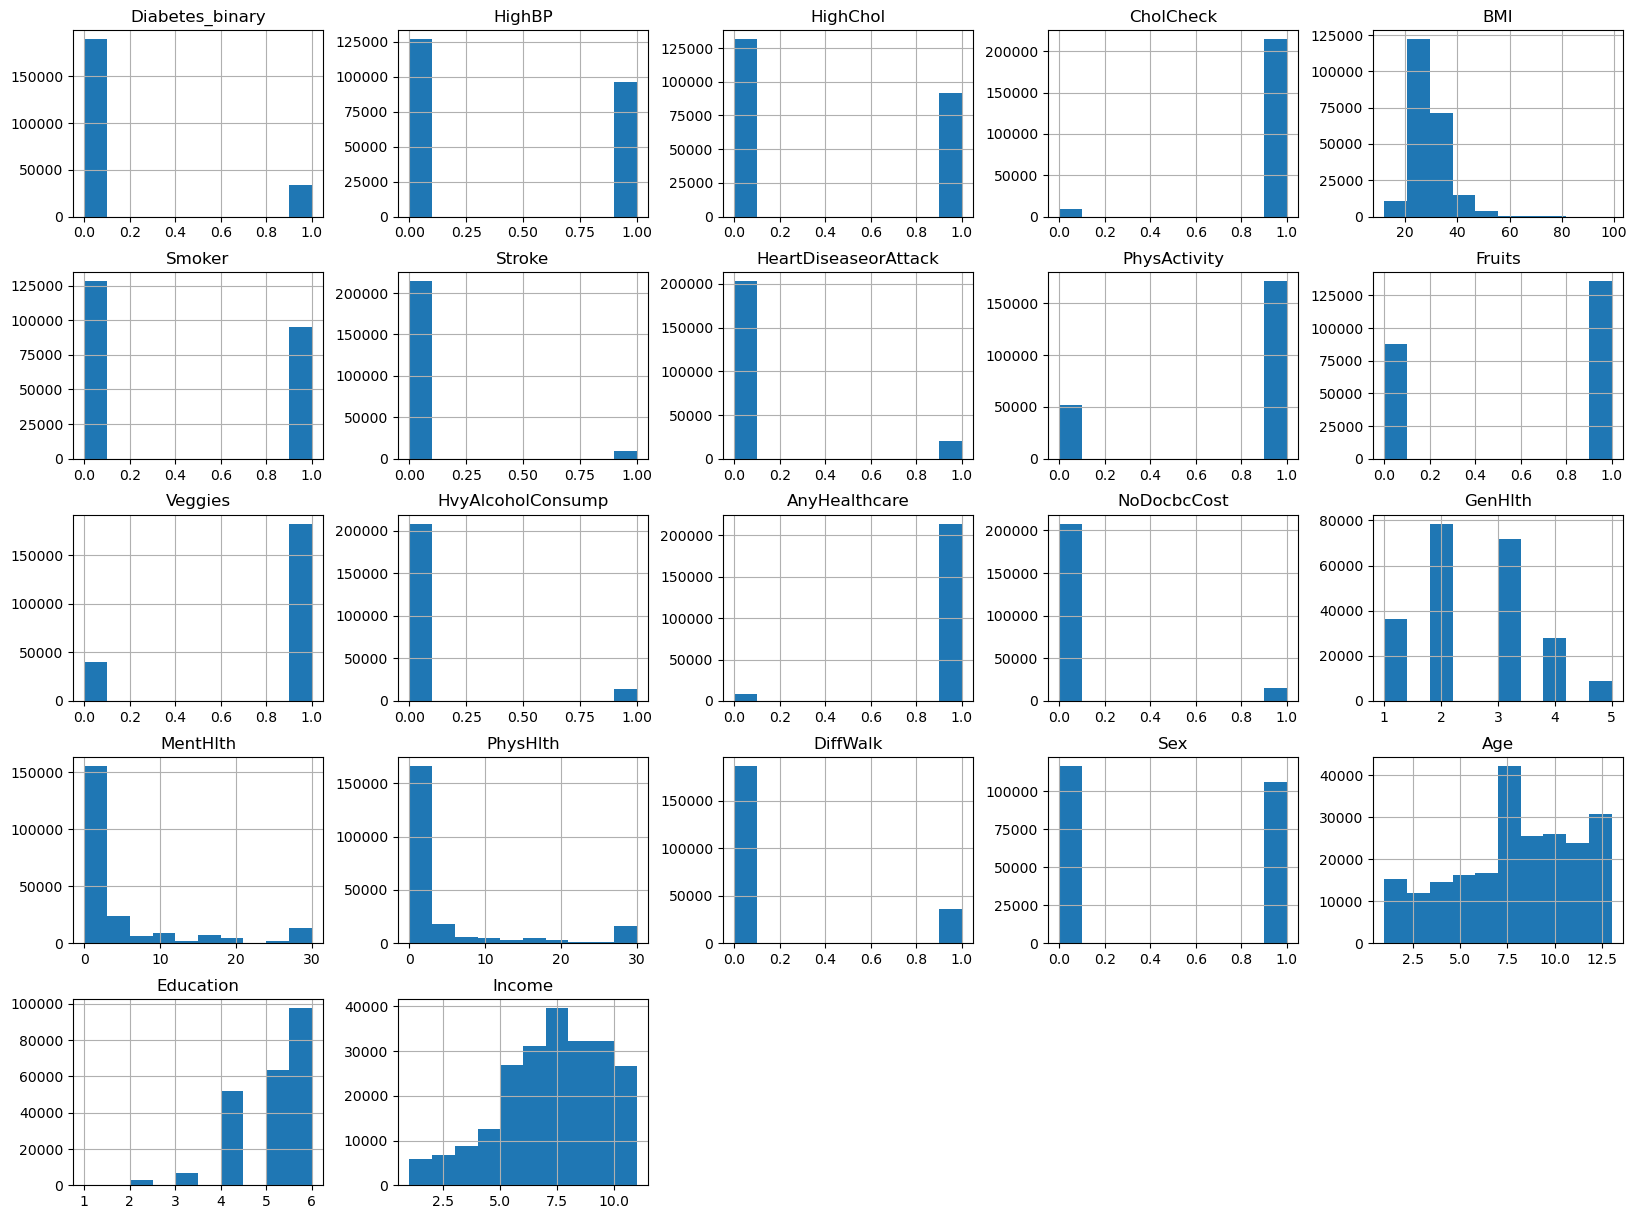

In [25]:
data.hist(figsize=(20,15));

In [26]:
cols = ['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Veggies','HvyAlcoholConsump',
       'AnyHealthcare','NoDocbcCost','DiffWalk']

In [27]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

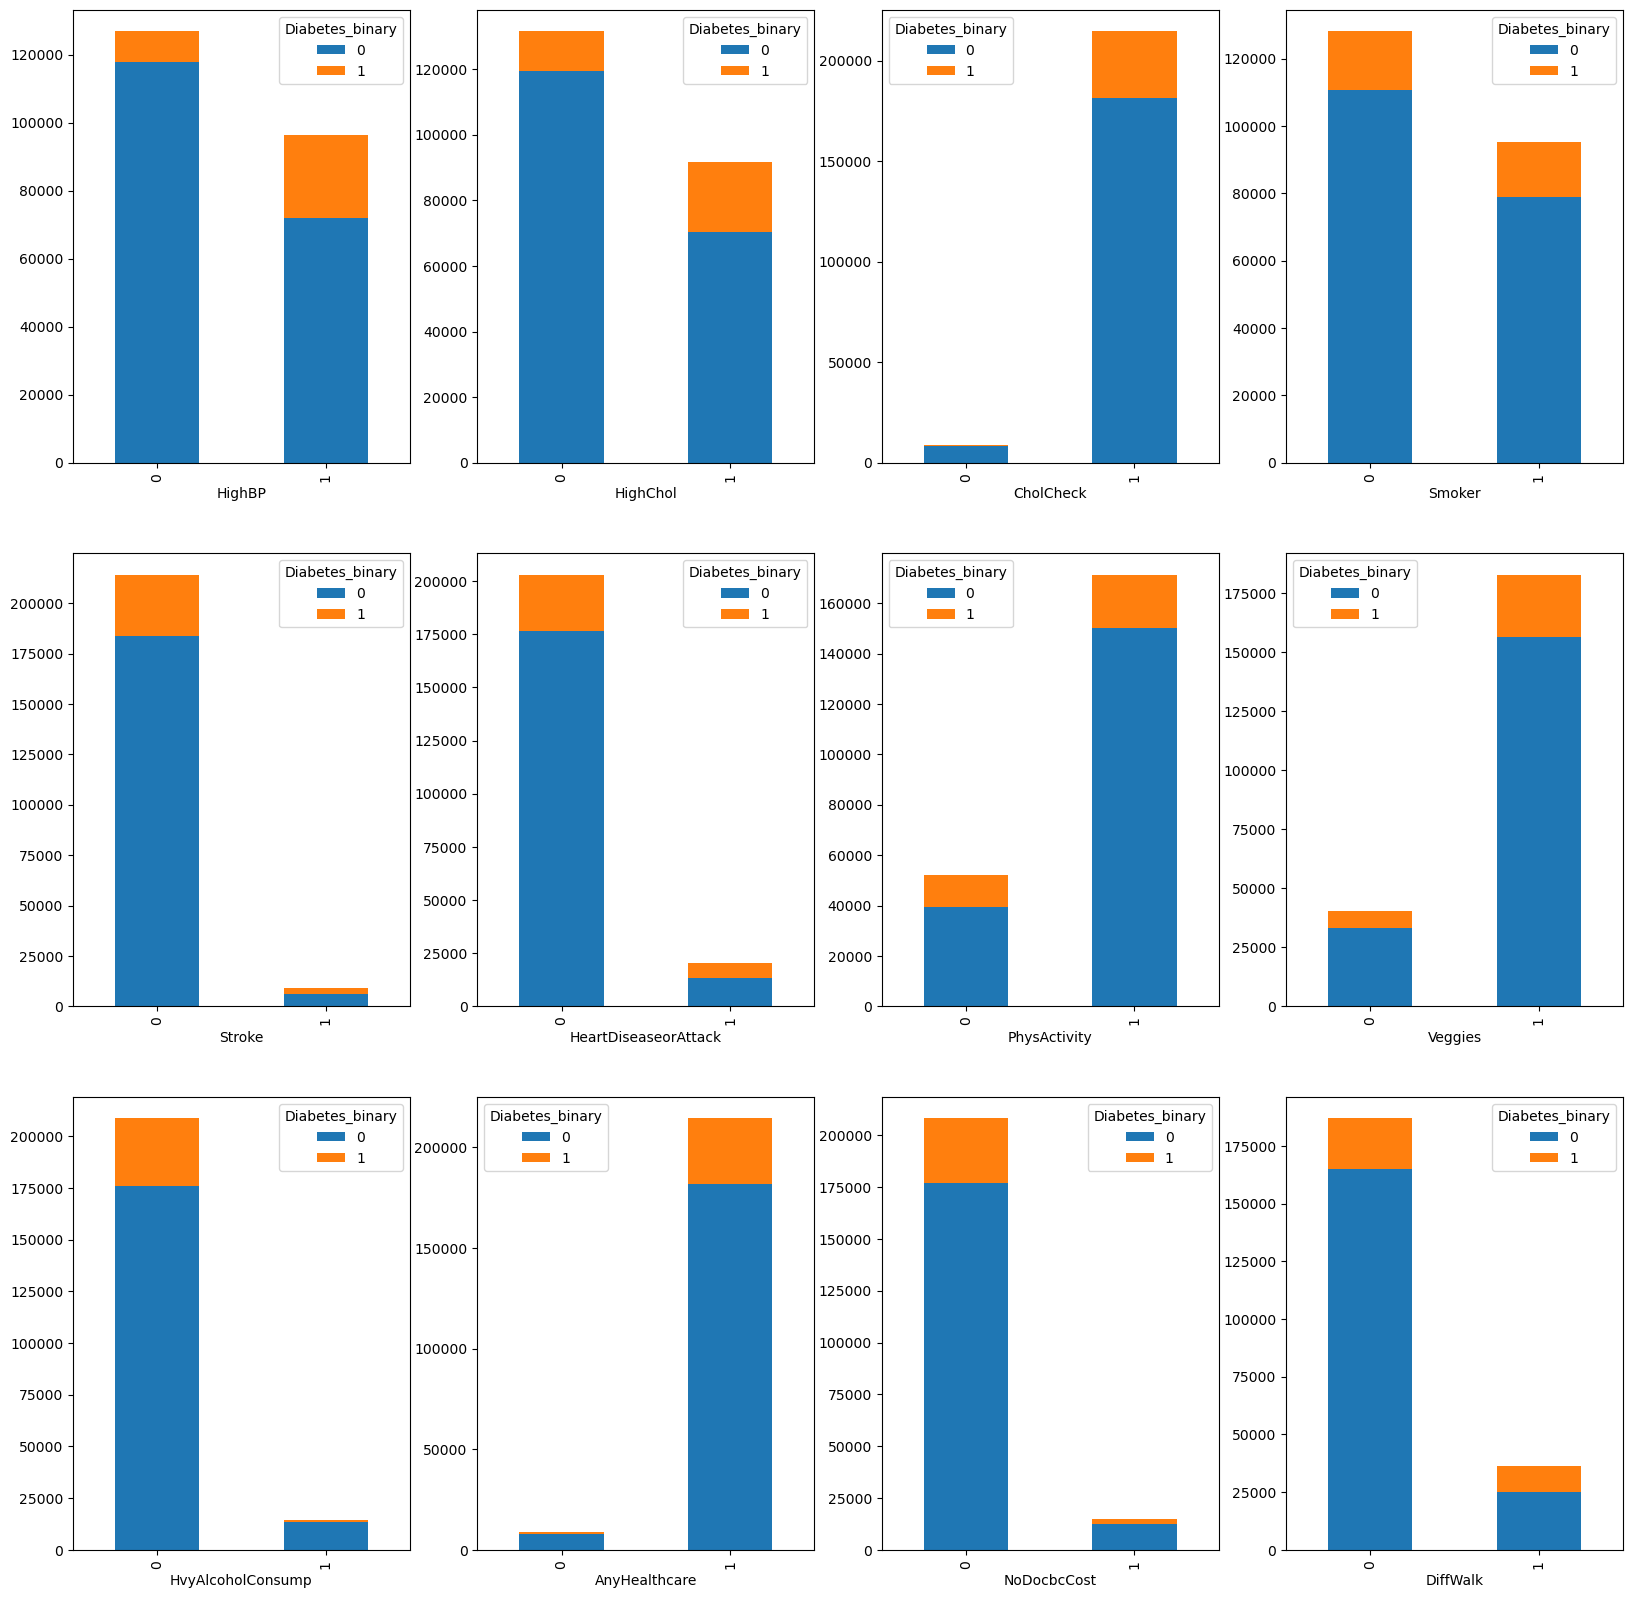

In [28]:
fig,ax=plt.subplots(3,4,figsize=(20,20))
axe=ax.ravel()
c=len(cols)
for i in range(c):
    create_plot_pivot(data2,cols[i]).plot(kind='bar',stacked=True,ax=axe[i])
    axe[i].set_xlabel(cols[i])
fig.show()

In [29]:
data2['Diabetes_binary'].value_counts()


0    189848
1     33395
Name: Diabetes_binary, dtype: int64

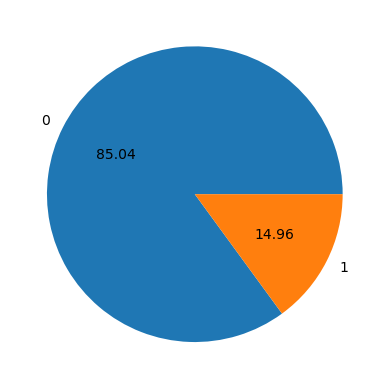

In [30]:
import matplotlib.pyplot as plt

# Assuming data2["Diabetes_012"] contains categorical values
labels = data2["Diabetes_binary"].value_counts().index
plt.pie(data2["Diabetes_binary"].value_counts(), labels=labels, autopct='%.02f')
plt.show()


In [31]:
data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})

In [32]:
data

Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       0         1          1   15       1       0   
1                     1       1         0          1   28       0       0   
2                     1       1         1          1   33       0       0   
3                     1       0         1          1   29       0       1   
4                     0       0         0          1   24       1       0   
...                 ...     ...       ...        ...  ...     ...     ...   
236373                1       1         1          1   21       0       0   
236374                0       1         0          1   25       1       0   
236375                0       0         1          1   31       0       0   
236376                0       1         0          1   24       0       0   
236377                0       0         1          1   32       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  \
0                          0             0       1  ...            0        5   
1                          1             0       1  ...            0        2   
2                          0             1       1  ...            0        2   
3                          1             1       1  ...            0        5   
4                          0             0       0  ...            0        3   
...                      ...           ...     ...  ...          ...      ...   
236373                     0             1       1  ...            0        4   
236374                     0             1       1  ...            1        2   
236375                     0             1       1  ...            0        2   
236376                     0             1       1  ...            0        2   
236377                     0             1       0  ...            0        1   

        MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  \
0             10        20         0    0   11          4       5   
1              0         0         0    0   11          4       3   
2             10         0         0    0    9          4       7   
3              0        30         1    1   12          3       4   
4              0         0         1    1   13          5       6   
...          ...       ...       ...  ...  ...        ...     ...   
236373         0         0         0    1   10          2       3   
236374        20         0         0    0    3          4       5   
236375         0         0         0    1    7          6      10   
236376         0         0         0    1   10          4       6   
236377         2         2         0    0    6          6       6   

        Diabetes_binary_str  
0              Non-Diabetic  
1                  Diabetic  
2                  Diabetic  
3                  Diabetic  
4              Non-Diabetic  
...                     ...  
236373             Diabetic  
236374         Non-Diabetic  
236375         Non-Diabetic  
236376         Non-Diabetic  
236377         Non-Diabetic  

[223243 rows x 23 columns]

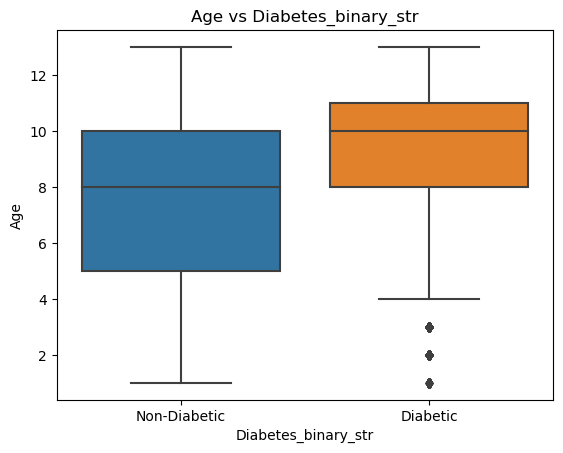

In [72]:
sns.boxplot( x="Diabetes_binary_str", y='Age',data=data)
plt.title('Age vs Diabetes_binary_str')
plt.show()

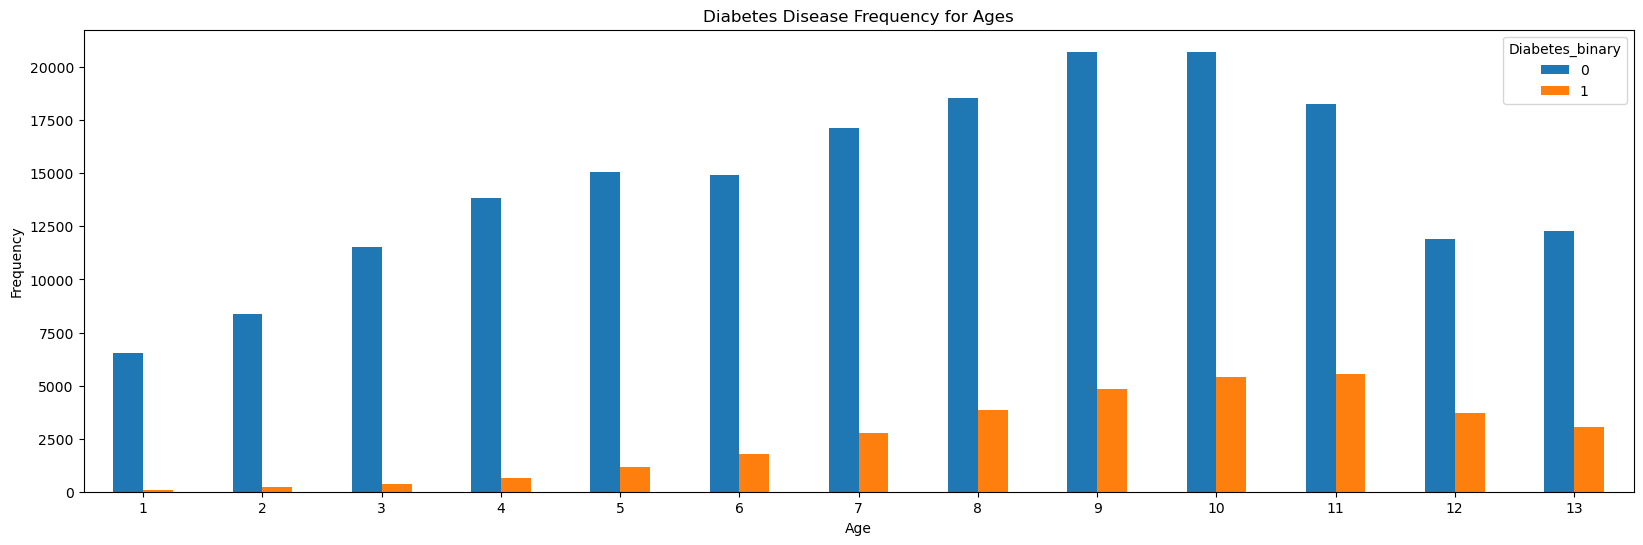

In [73]:
pd.crosstab(data2.Age,data2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

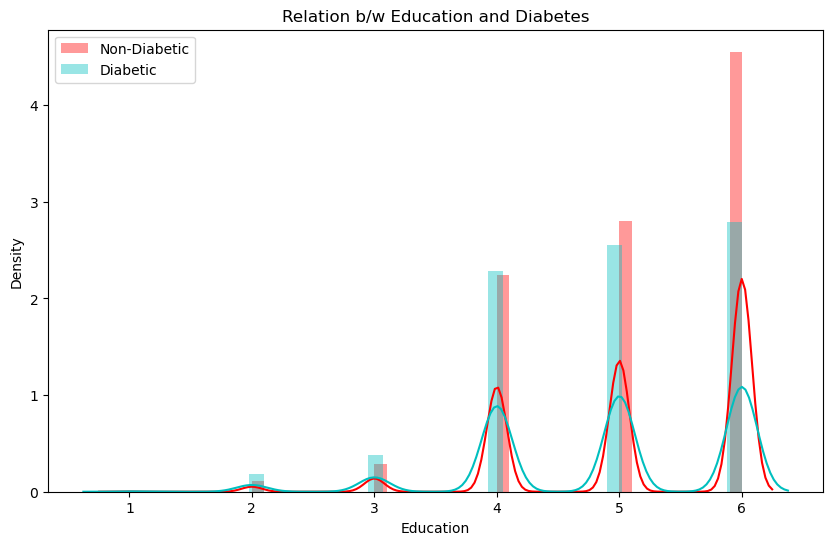

In [74]:
plt.figure(figsize=(10,6))
sns.distplot(data.Education[data.Diabetes_binary==0],color="r",label="Non-Diabetic")
sns.distplot(data.Education[data.Diabetes_binary==1],color="c",label="Diabetic")
plt.title("Relation b/w Education and Diabetes")
plt.legend()

Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

<Figure size 2000x1000 with 0 Axes>

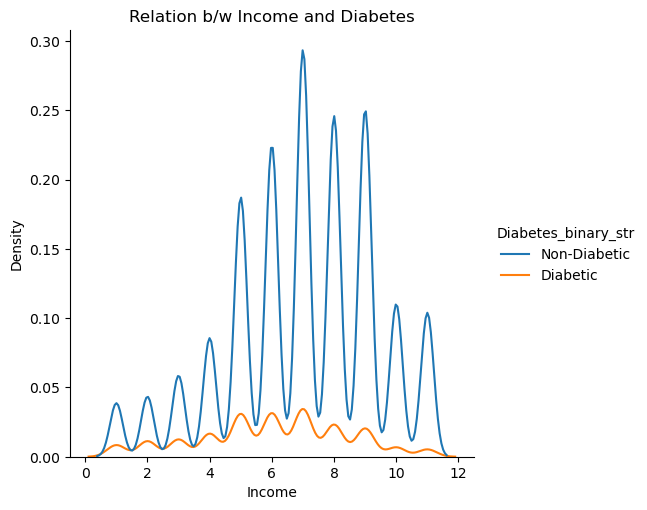

In [75]:
plt.figure(figsize=(20,10))
sns.displot(data=data,x="Income",hue="Diabetes_binary_str",kind="kde")
plt.title("Relation b/w Income and Diabetes")

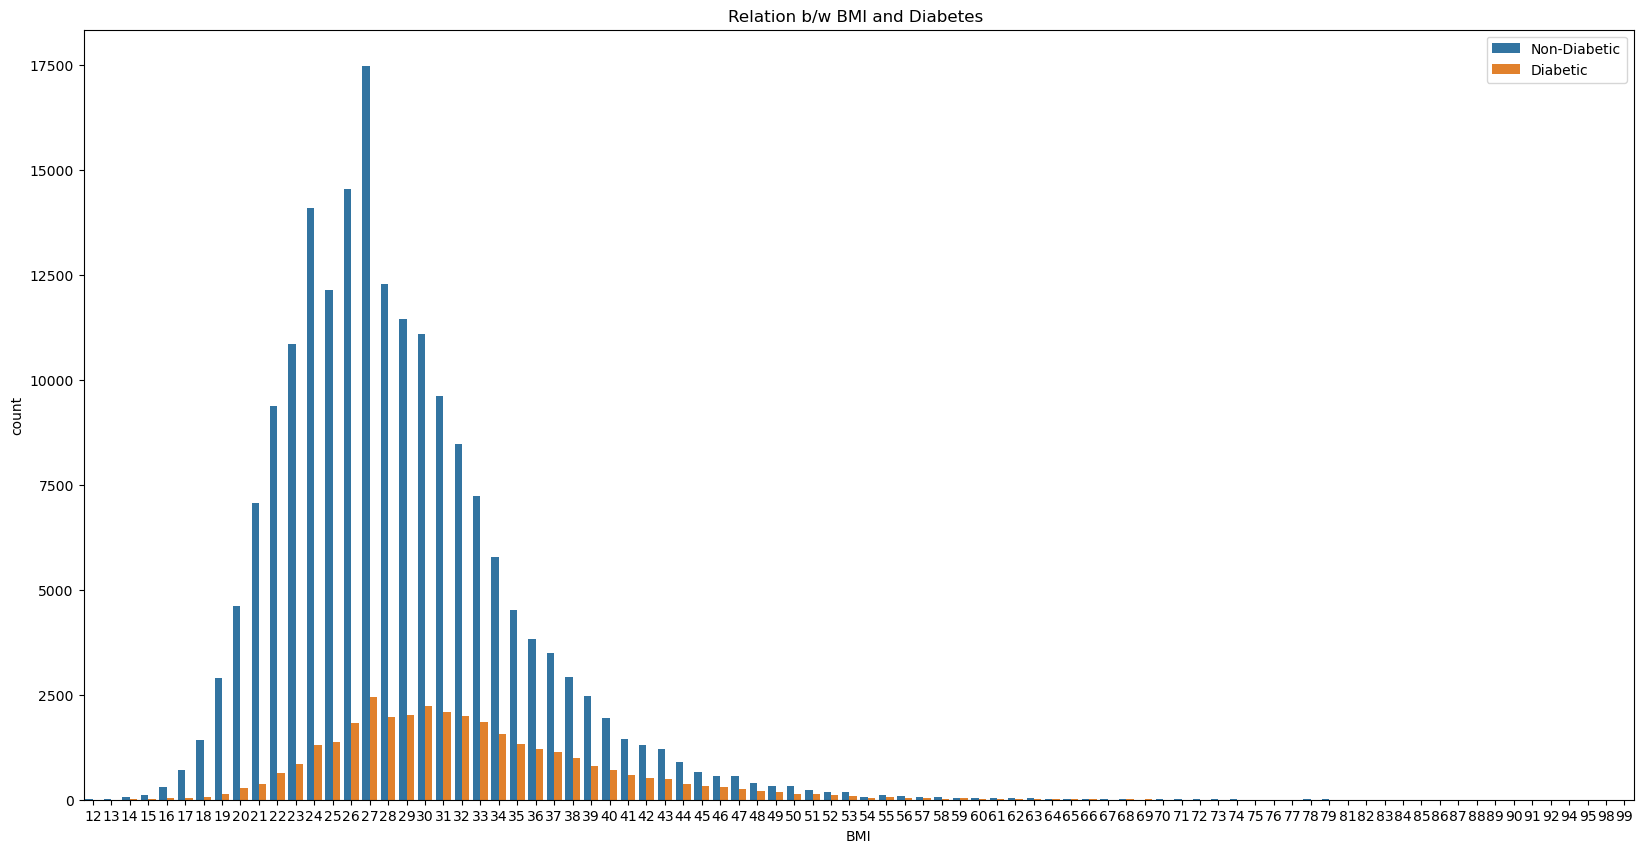

In [76]:
plt.figure(figsize=(20,10))
sns.countplot(data,x="BMI",hue="Diabetes_binary_str")
plt.title("Relation b/w BMI and Diabetes ")
plt.legend()

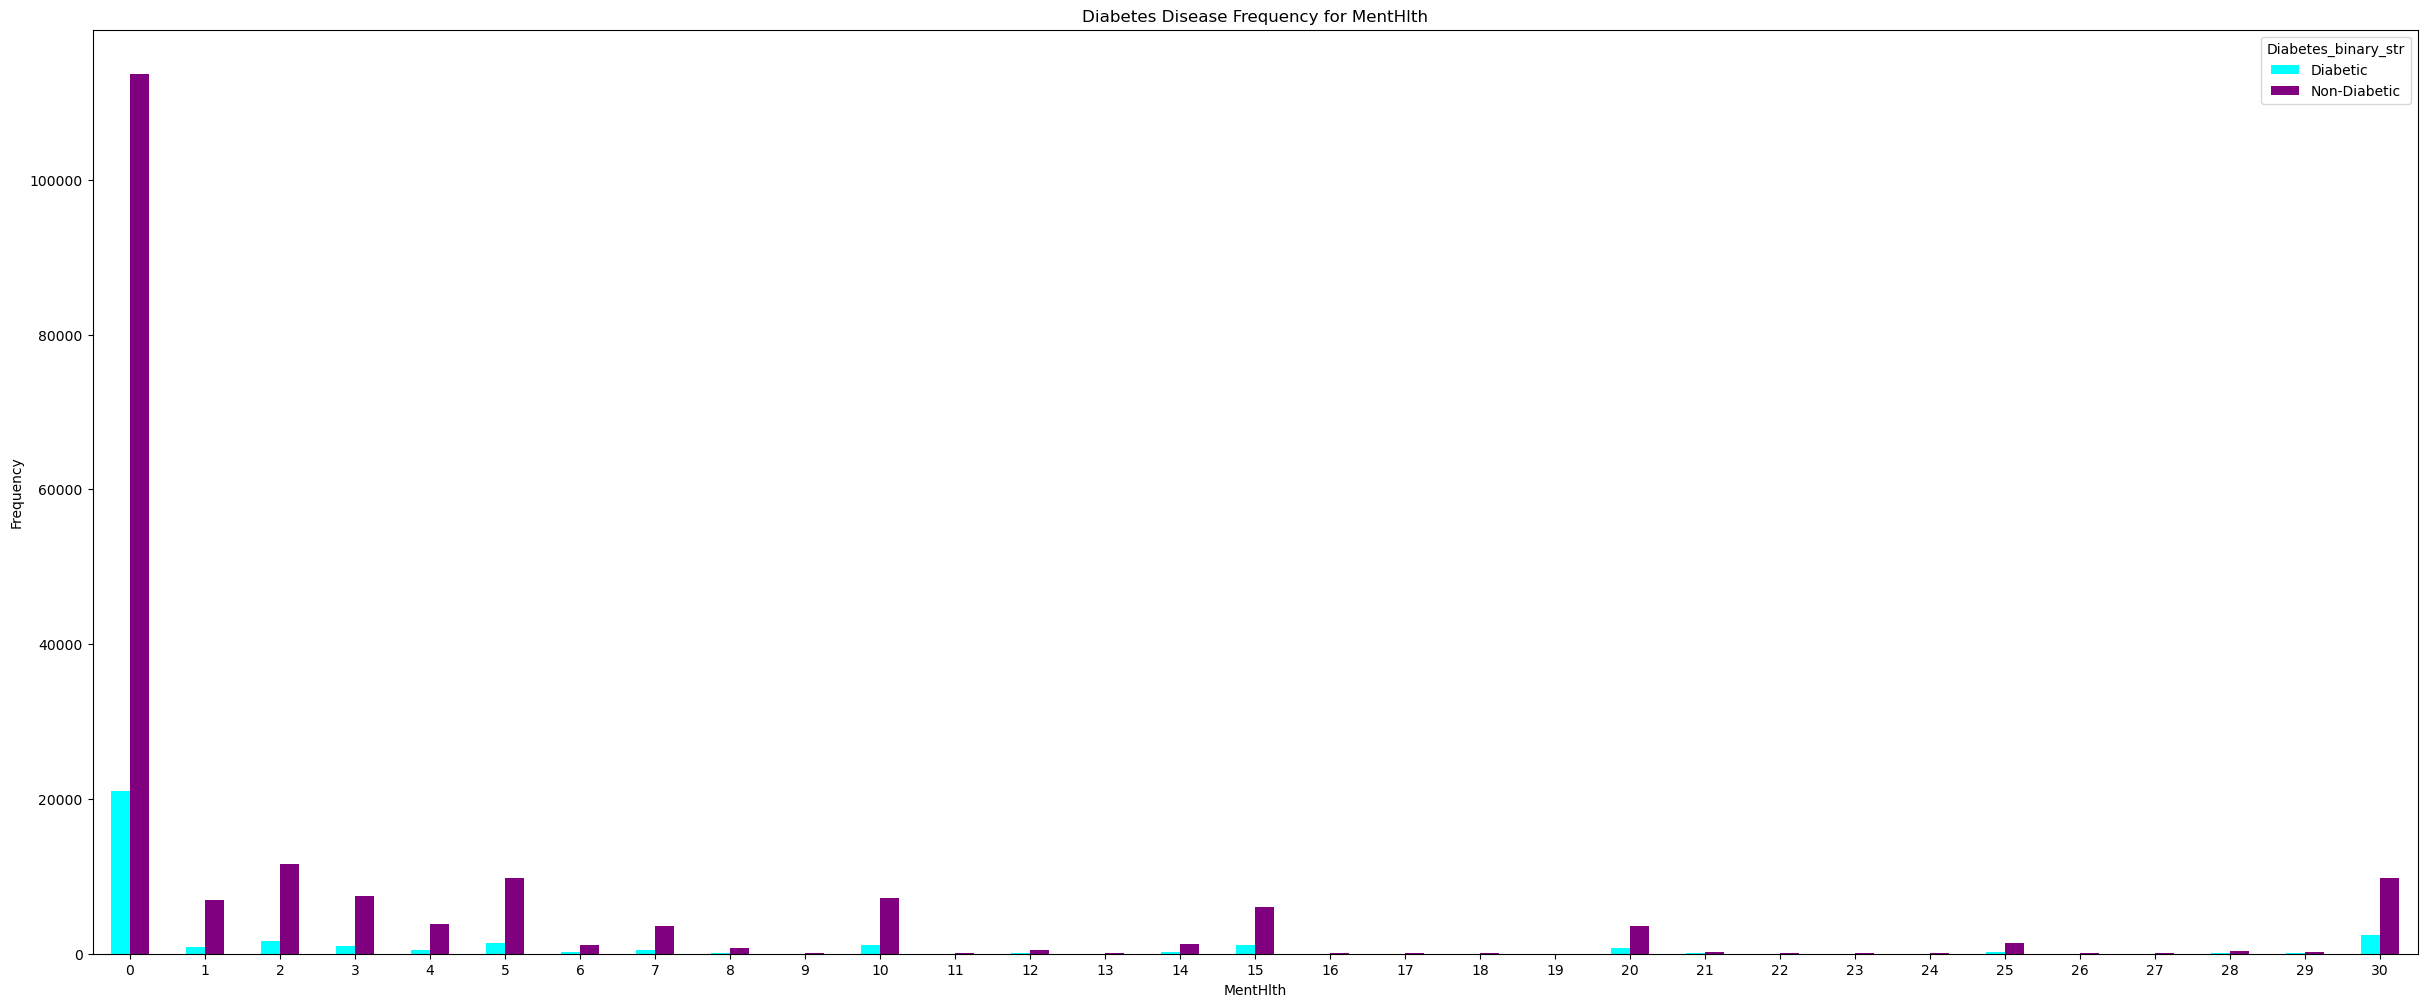

In [77]:
pd.crosstab(data.MentHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['Cyan','Purple'])
plt.title("Diabetes Disease Frequency for MentHlth")
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Diabetes')

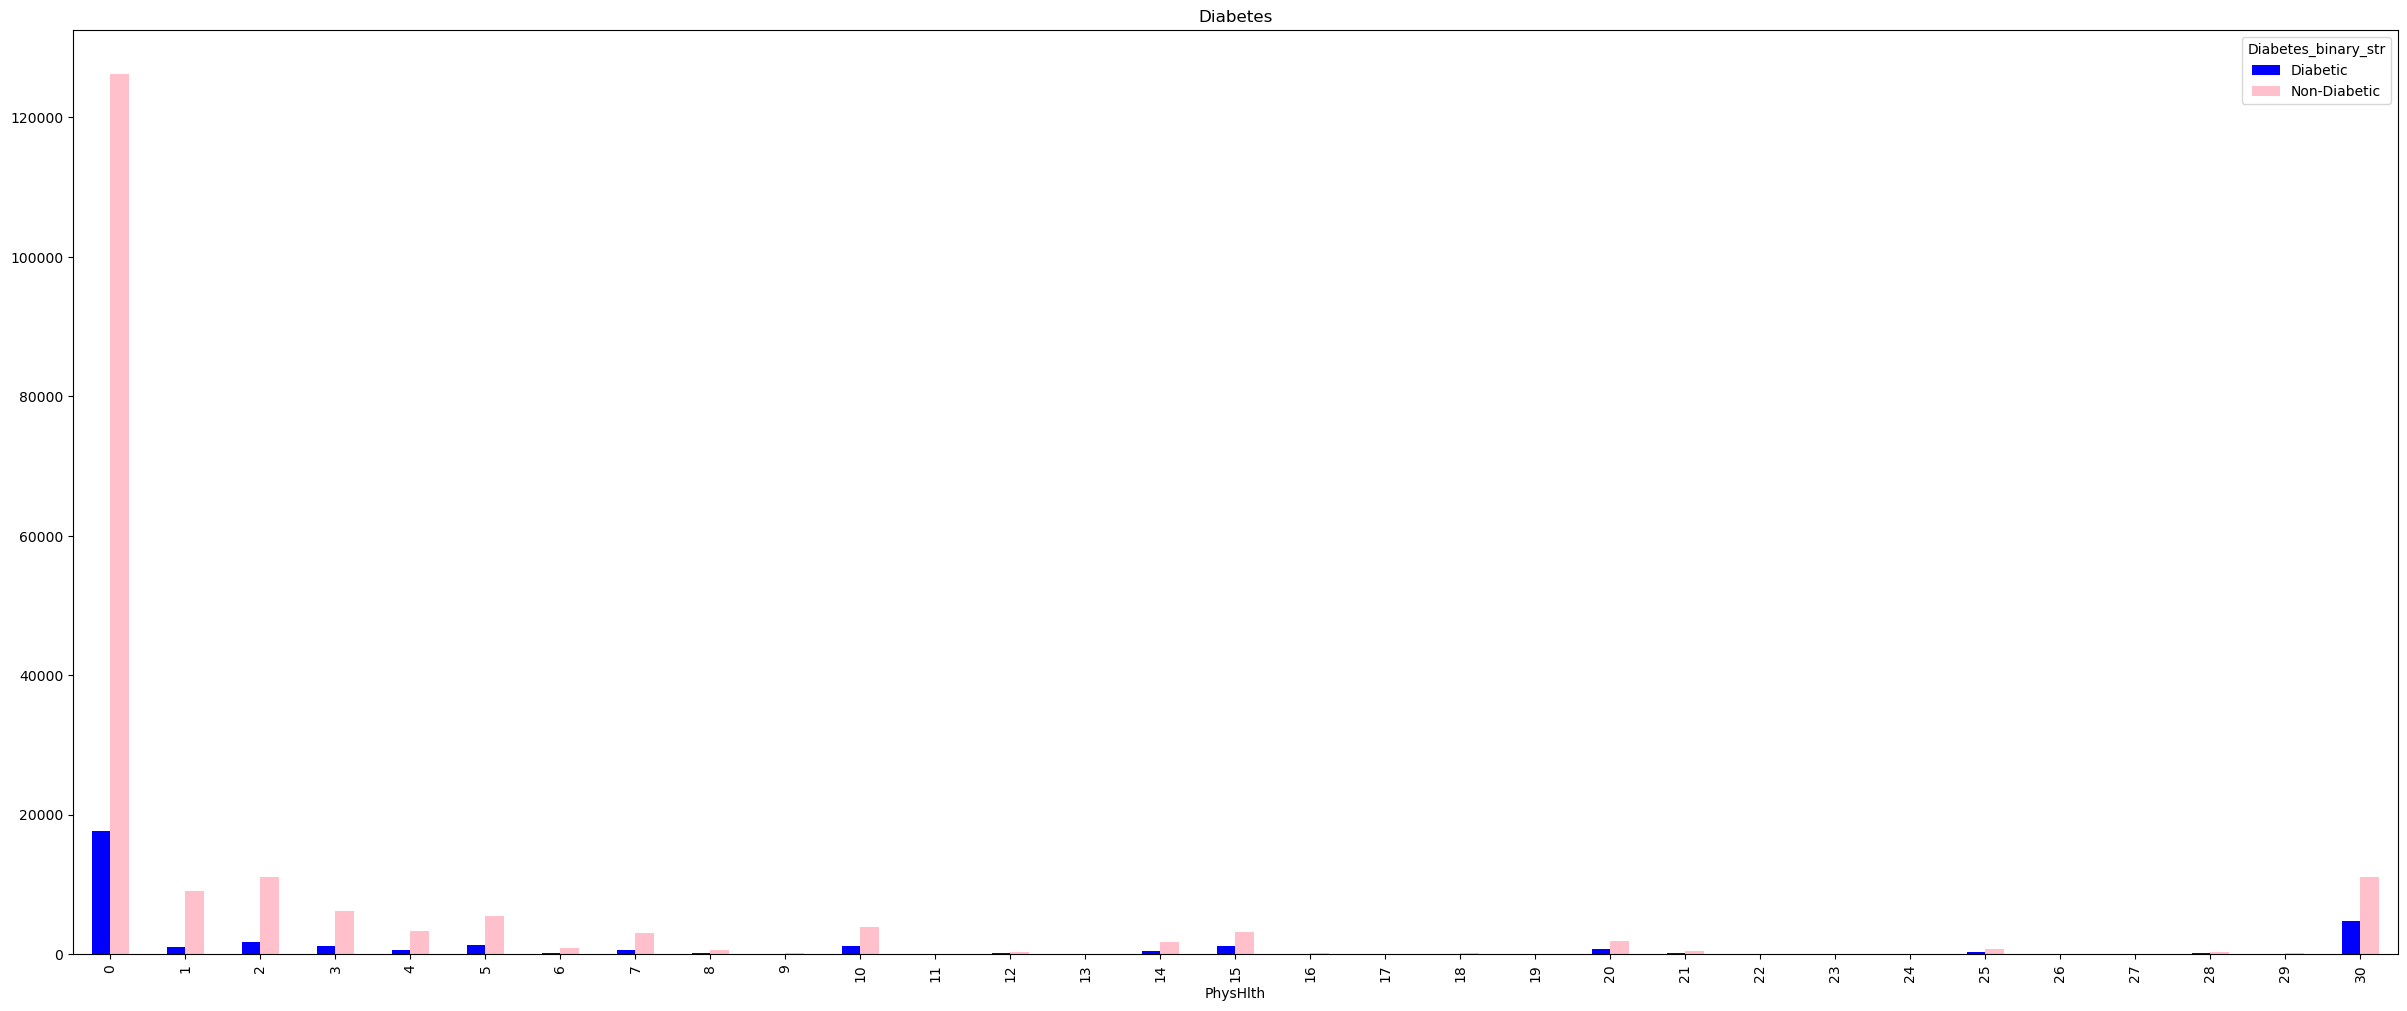

In [78]:
pd.crosstab(data.PhysHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['Blue','Pink'])
plt.title('Diabetes')

In [79]:
import pandas as pd

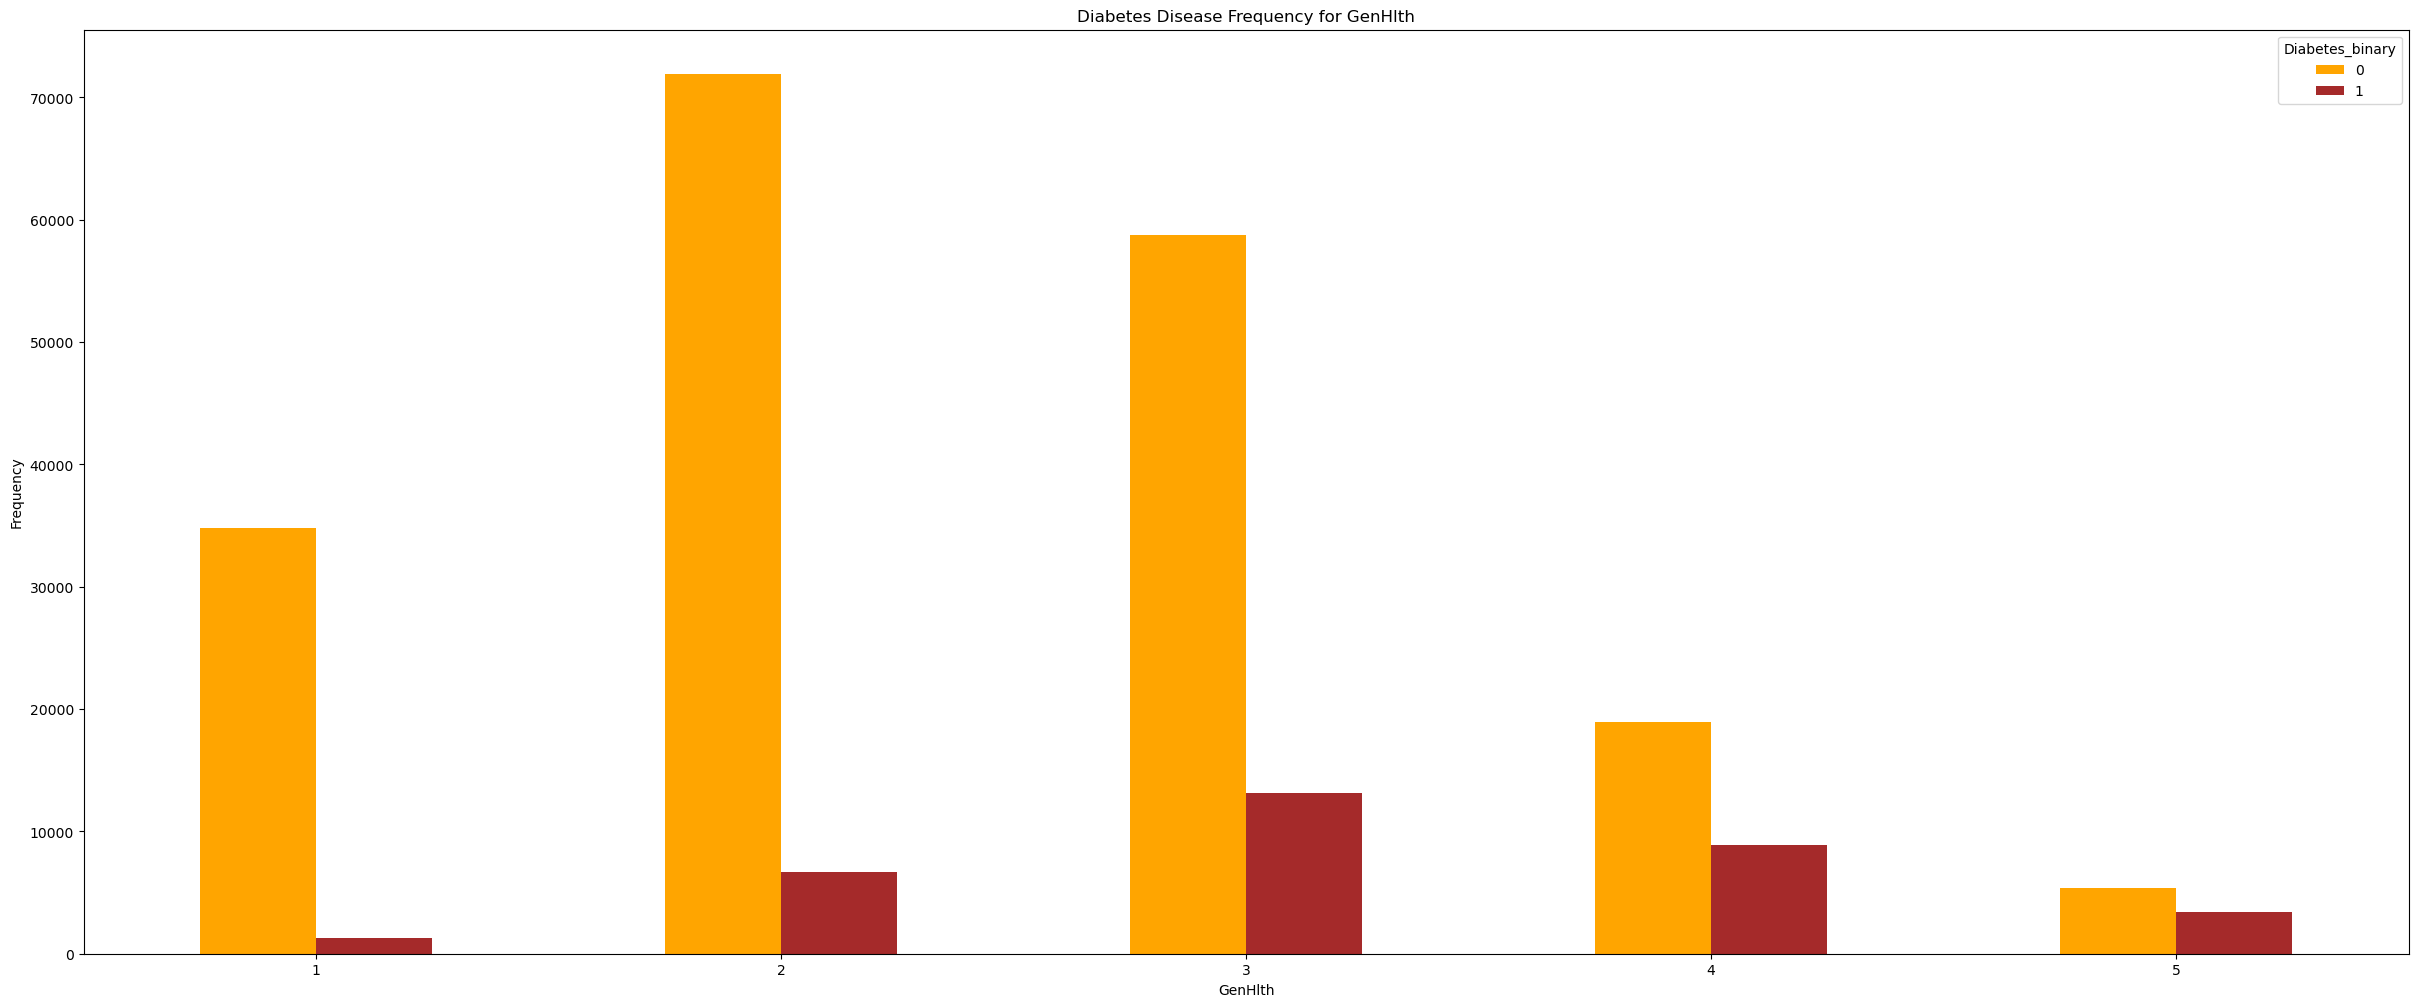

In [80]:
pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind='bar',figsize=(30,12),color=['Orange','Brown'])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Feature Selections

data.drop(['Diabetes_binary','Diabetes_binary_str'],axis=1).corrwith(data.Diabetes_binary).plot(kind='bar',grid=True,figsize=(20,8)
,title="Correlation with Diabetes_binary",color='Purple');

VIF Test

In [81]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  # Make sure to import add_constant


In [36]:
def calc_VIF(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
X=add_constant(original_data)
ds=pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print(ds)

const                   122.078775
Diabetes_binary           1.187221
HighBP                    1.332464
HighChol                  1.175202
CholCheck                 1.048253
BMI                       1.174940
Smoker                    1.098596
Stroke                    1.069496
HeartDiseaseorAttack      1.158434
PhysActivity              1.200475
Fruits                    1.082997
Veggies                   1.084989
HvyAlcoholConsump         1.025476
AnyHealthcare             1.129791
NoDocbcCost               1.143437
GenHlth                   1.716120
MentHlth                  1.231285
PhysHlth                  1.536002
DiffWalk                  1.473067
Sex                       1.074073
Age                       1.425164
Education                 1.296028
Income                    1.454653
dtype: float64


In [37]:
X=original_data.iloc[:,1:]
Y=original_data.iloc[:,0]

In [38]:
fs=SelectKBest(score_func=f_classif,k=10)
X_selected=fs.fit_transform(X,Y)
print(X_selected.shape)

(236378, 10)


In [39]:
pd.DataFrame(X_selected).head(3)


0    1     2    3    4    5     6    7     8    9
0  0.0  1.0  15.0  0.0  0.0  5.0  20.0  0.0  11.0  5.0
1  1.0  0.0  28.0  1.0  0.0  2.0   0.0  0.0  11.0  3.0
2  1.0  1.0  33.0  0.0  1.0  2.0   0.0  0.0   9.0  7.0

Chi Square


In [44]:
BestFeatures = SelectKBest(score_func=chi2,k=10)
fit=BestFeatures.fit(X,Y)
df_scores = pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
f_scores =pd.concat([df_columns,df_scores],axis=1)
f_scores.columns = ['Feature','Score']
f_scores

Feature          Score
0                 HighBP    9315.114284
1               HighChol    5487.828992
2              CholCheck      40.755005
3                    BMI   14129.012544
4                 Smoker     451.292612
5                 Stroke    2343.124171
6   HeartDiseaseorAttack    6638.154494
7           PhysActivity    1142.297495
8                 Fruits      73.710068
9                Veggies      86.314236
10     HvyAlcoholConsump     724.271381
11         AnyHealthcare       6.774205
12           NoDocbcCost      39.266735
13               GenHlth    7847.210017
14              MentHlth    4865.335431
15              PhysHlth  109774.699301
16              DiffWalk    8782.595881
17                   Sex     147.641195
18                   Age   11483.365130
19             Education     430.918003
20                Income    4417.444380

In [46]:
print(f_scores.nlargest(16,'Score'))

                 Feature          Score
15              PhysHlth  109774.699301
3                    BMI   14129.012544
18                   Age   11483.365130
0                 HighBP    9315.114284
16              DiffWalk    8782.595881
13               GenHlth    7847.210017
6   HeartDiseaseorAttack    6638.154494
1               HighChol    5487.828992
14              MentHlth    4865.335431
20                Income    4417.444380
5                 Stroke    2343.124171
7           PhysActivity    1142.297495
10     HvyAlcoholConsump     724.271381
4                 Smoker     451.292612
19             Education     430.918003
17                   Sex     147.641195
